In [147]:
# %pip install --upgrade pip 
# %pip install nltk
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install wordcloud
# %matplotlib inline 
# %pip install scikit-learn
# %pip install xgboost
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [148]:
data = pd.read_csv('data/spam.csv', encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [149]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  49 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [150]:
data.shape

(5572, 5)

In [151]:
data['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [152]:
data.duplicated().sum()

np.int64(403)

In [153]:
data = data.drop_duplicates(keep='first')

In [154]:
data.duplicated().sum()

np.int64(0)

In [155]:
data.shape

(5169, 5)

In [156]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5127
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [157]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2":"text", "v1":"label"})

In [158]:
data[1:10]

,label,text
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [159]:
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

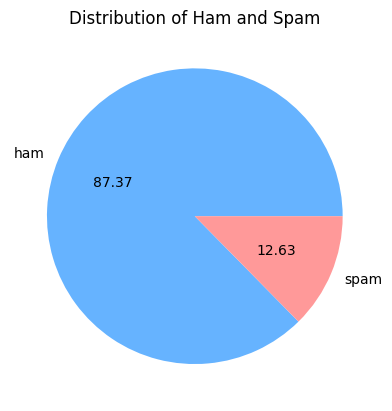

In [160]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

(0.0, 500.0)

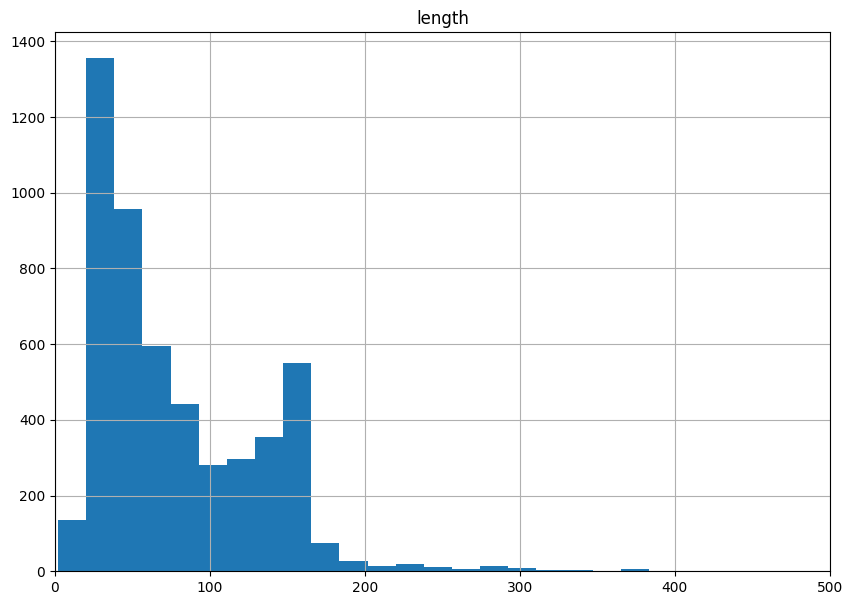

In [161]:
data['length'] = data['text'].map(lambda x: len(x))
data.hist(column='length', figsize=(10,7), bins=50)
plt.xlim(0, 500)

Text(0.5, 0.98, 'Message Length by Label')

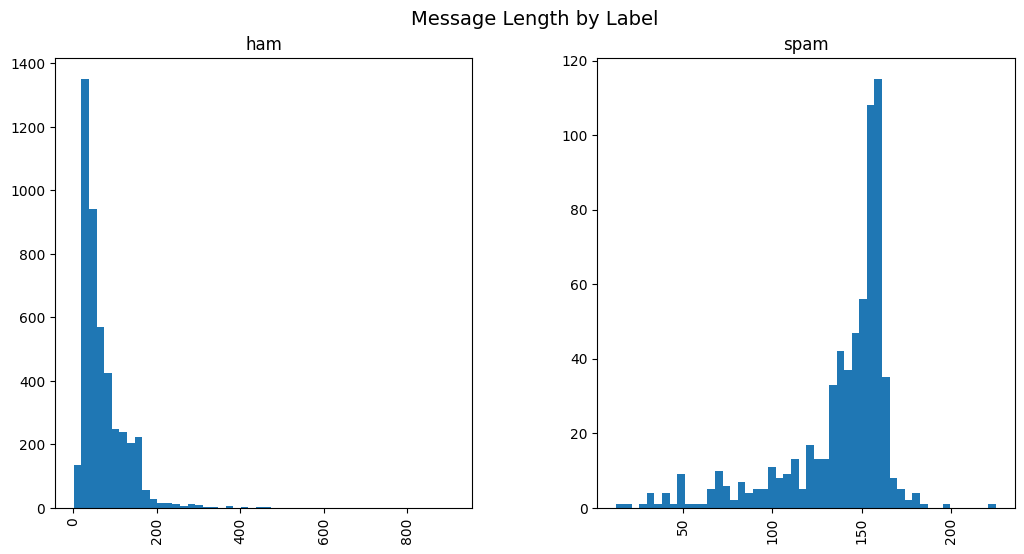

In [162]:
data.hist(column='length', by='label', figsize=(12,6), bins=50)
plt.suptitle("Message Length by Label", fontsize=14)

In [163]:
import nltk 
# nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

In [164]:
ham_words = ''
spam_words = ''

In [165]:
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [166]:
spam_words[:100]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entr'

In [167]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

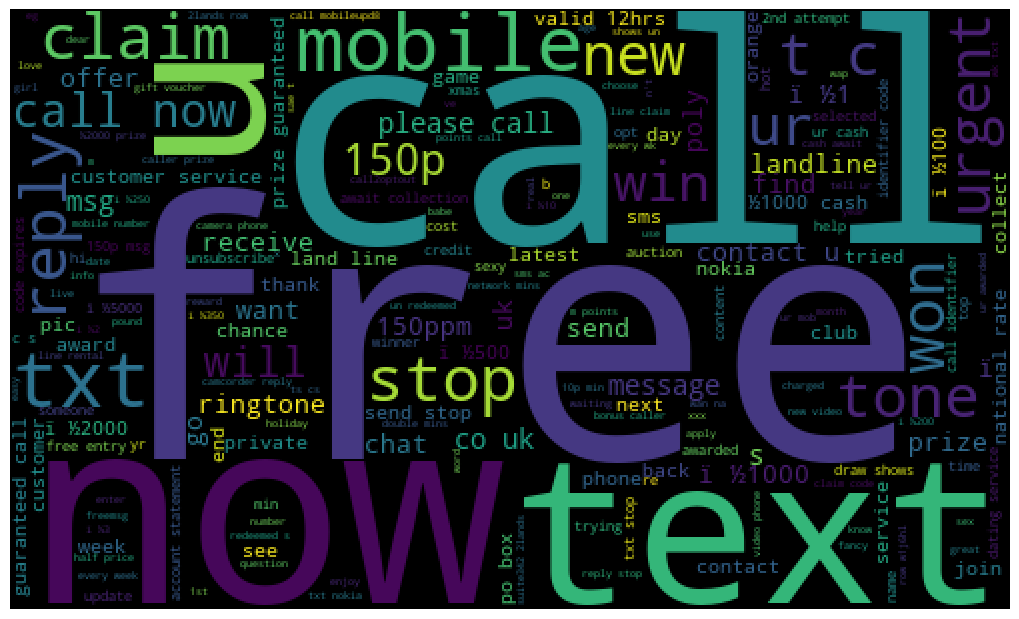

In [168]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

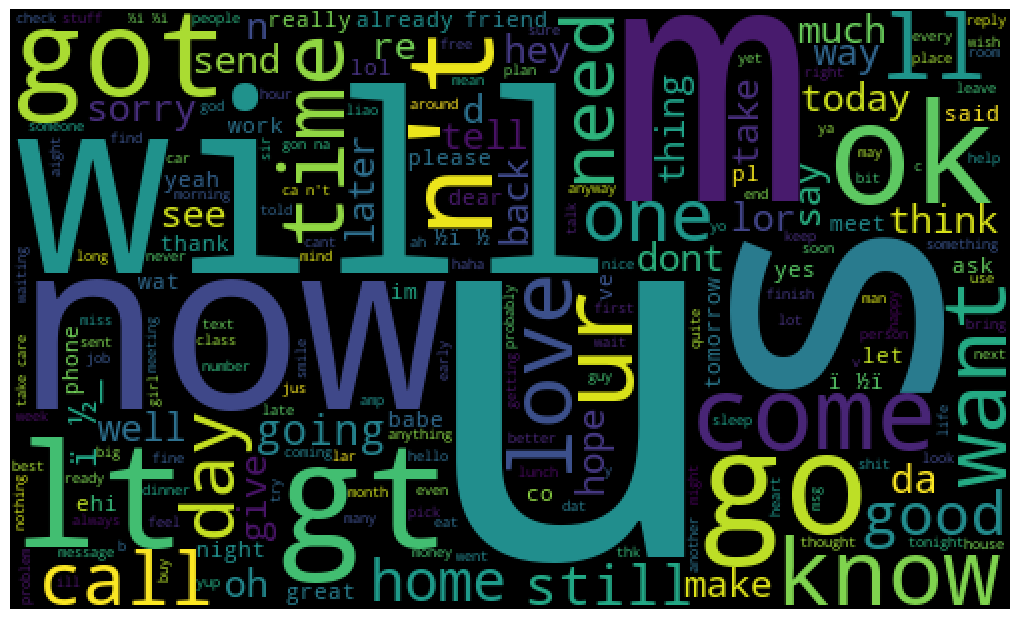

In [169]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [170]:
data = data.replace(['ham','spam'],[0, 1])
data.head(10)

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,149
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,159
9,1,Had your mobile 11 months or more? U R entitle...,154


In [171]:
import string
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [172]:
##counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  15586


In [173]:
## sorting in decreasing order
# 
# vocab = sorted(total_counts, key=total_counts.get, reverse=True)
# print(vocab[:60]) 

In [174]:
## mapping from words to index

# vocab_size = len(vocab)
# word2idx ={}
# #print vocab_size

# for i, word in enumerate(vocab):
#     word2idx[word] = i

In [175]:
##text to vector
# def text_to_vector(text):
#     word_vector = np.zeros(vocab_size)
#     for word in text.split(" "):
#         if word2idx.get(word) is None:
#             continue
#         else:
#             word_vector[word2idx.get(word)] += 1
#     return np.array(word_vector)

In [176]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=10000)

In [177]:
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer() 
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [178]:
data['transformed_text'] = data['text'].apply(transform_text)

In [179]:
spam_corpus = []
for msg in data[data['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

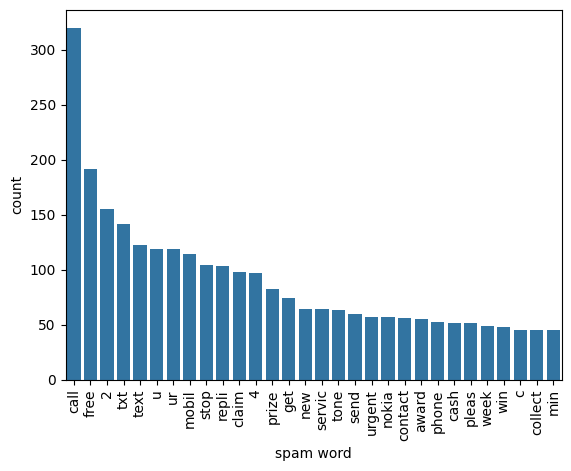

In [180]:
from collections import Counter
import seaborn as sns
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam word', 'count'])
sns.barplot(x='spam word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [181]:
ham_corpus = []
for msg in data[data['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

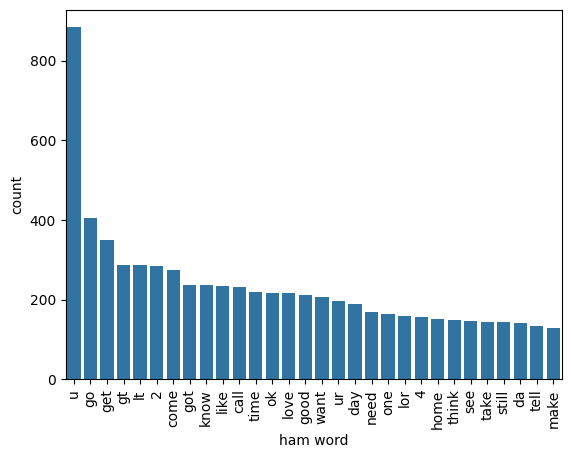

In [182]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham word', 'count'])
sns.barplot(x='ham word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
X = tfidf.fit_transform(data['transformed_text']).toarray()
X.shape

(5169, 6674)

In [184]:
y=data['label'].values

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)